In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle
import os
print('CWD is ',os.getcwd())

# visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = False

# Image
from PIL import Image
import cv2

# deep learning
import tensorflow as tf
from tensorflow.keras import applications, optimizers, regularizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CWD is  /content


In [ ]:
# Data Paths
train_dir = '/content/drive/MyDrive/skin diseases/train'
test_dir = '/content/drive/MyDrive/skin diseases/test'

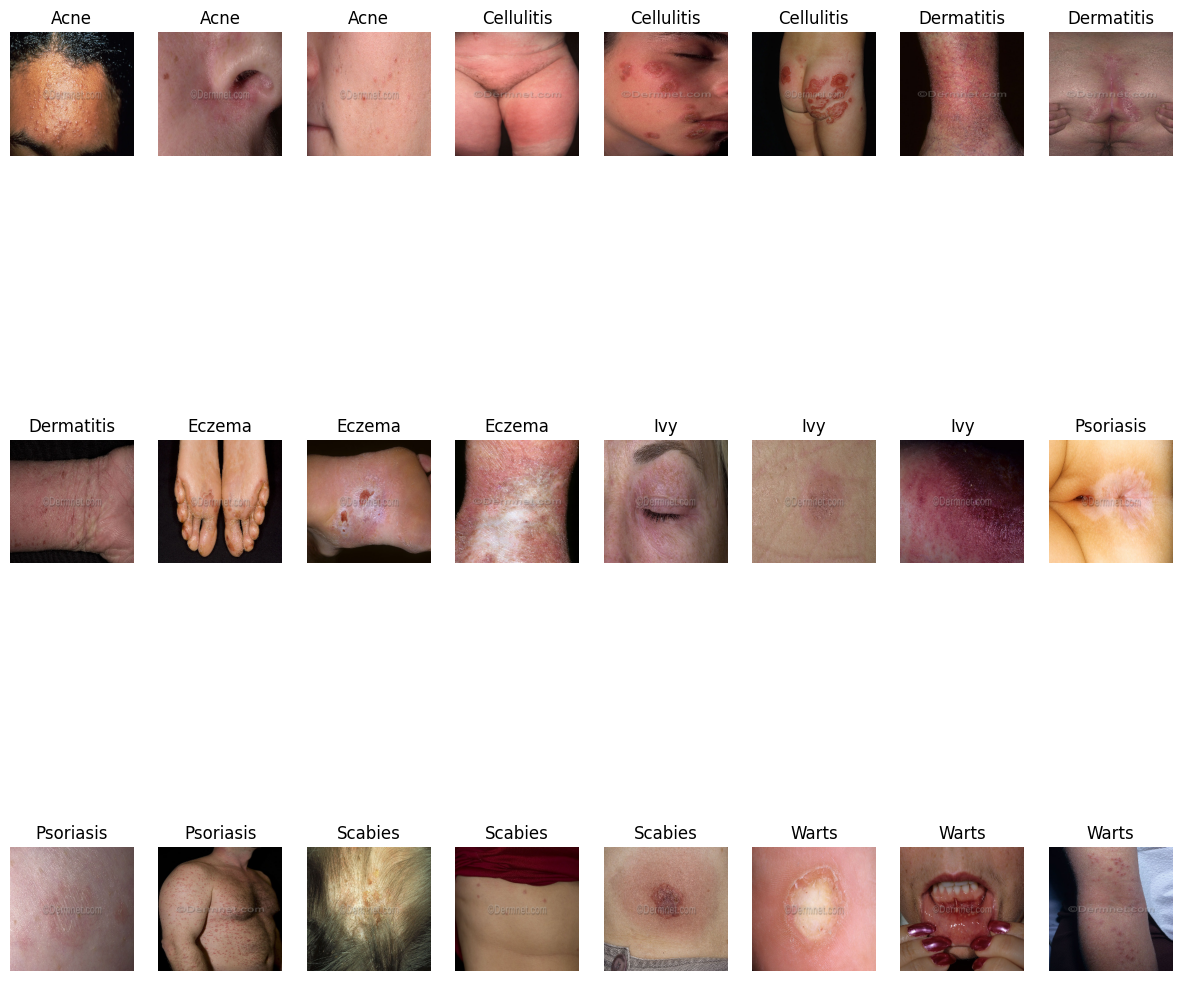

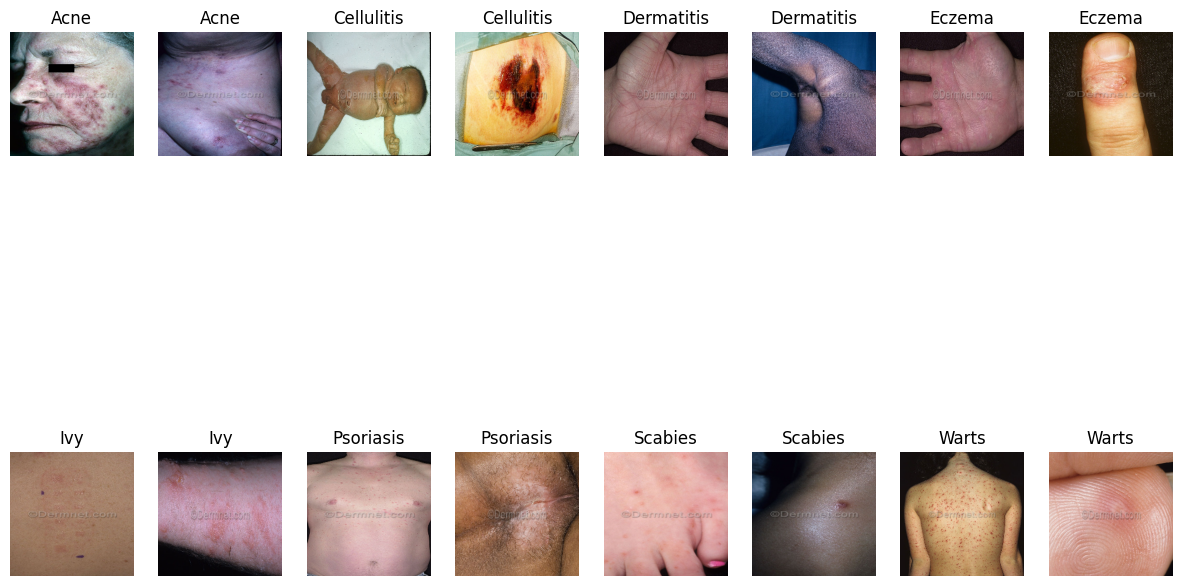

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Constants
IMG_SIZE = 224

# Function to visualize images
def visualize_imgs(data_dir, pts_per_class):
    classes = ['Acne', 'Cellulitis', 'Dermatitis','Eczema','Ivy','Psoriasis','Scabies','Warts']
    images = []
    labels = []

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        image_files = np.random.choice(os.listdir(class_dir), pts_per_class, replace=False)
        for img_file in image_files:
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)

    plt.figure(figsize=(15, pts_per_class*5))
    for i, img in enumerate(images):
        plt.subplot(pts_per_class, len(classes), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

visualize_imgs(train_dir, 3)
visualize_imgs(train_dir, 2)

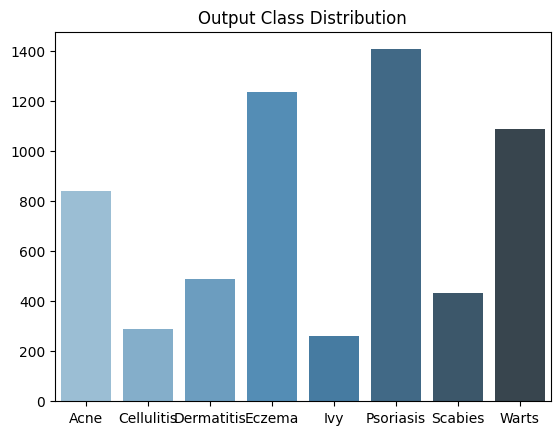

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns # import the seaborn library

# Constants
IMG_SIZE = 224

# Function to visualize data
def plot_classes(train_dir):
    classes = ['Acne', 'Cellulitis', 'Dermatitis','Eczema','Ivy','Psoriasis','Scabies','Warts']
    class_counts = [len(os.listdir(os.path.join(train_dir, c))) for c in classes]
    sns.barplot(x=classes, y=class_counts, palette="Blues_d") # Now sns is defined and can be used
    plt.title('Output Class Distribution')
    plt.show()

plot_classes(train_dir)

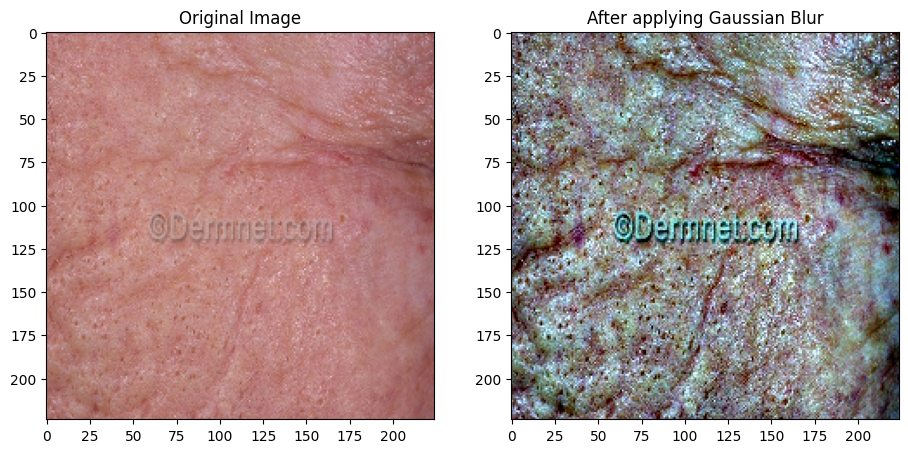

In [ ]:
# Function to apply Gaussian blur
def apply_gaussian_blur(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_t = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 30), -4, 128)
    return img, img_t

rn = np.random.randint(low=0, high=len(os.listdir(os.path.join(train_dir, 'Acne'))))
img_path = os.path.join(train_dir, 'Acne', os.listdir(os.path.join(train_dir, 'Acne'))[rn])
img = cv2.imread(img_path)
img, img_t = apply_gaussian_blur(img)

plt.figure(figsize=(11, 11))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_t)
plt.title('After applying Gaussian Blur')
plt.show()

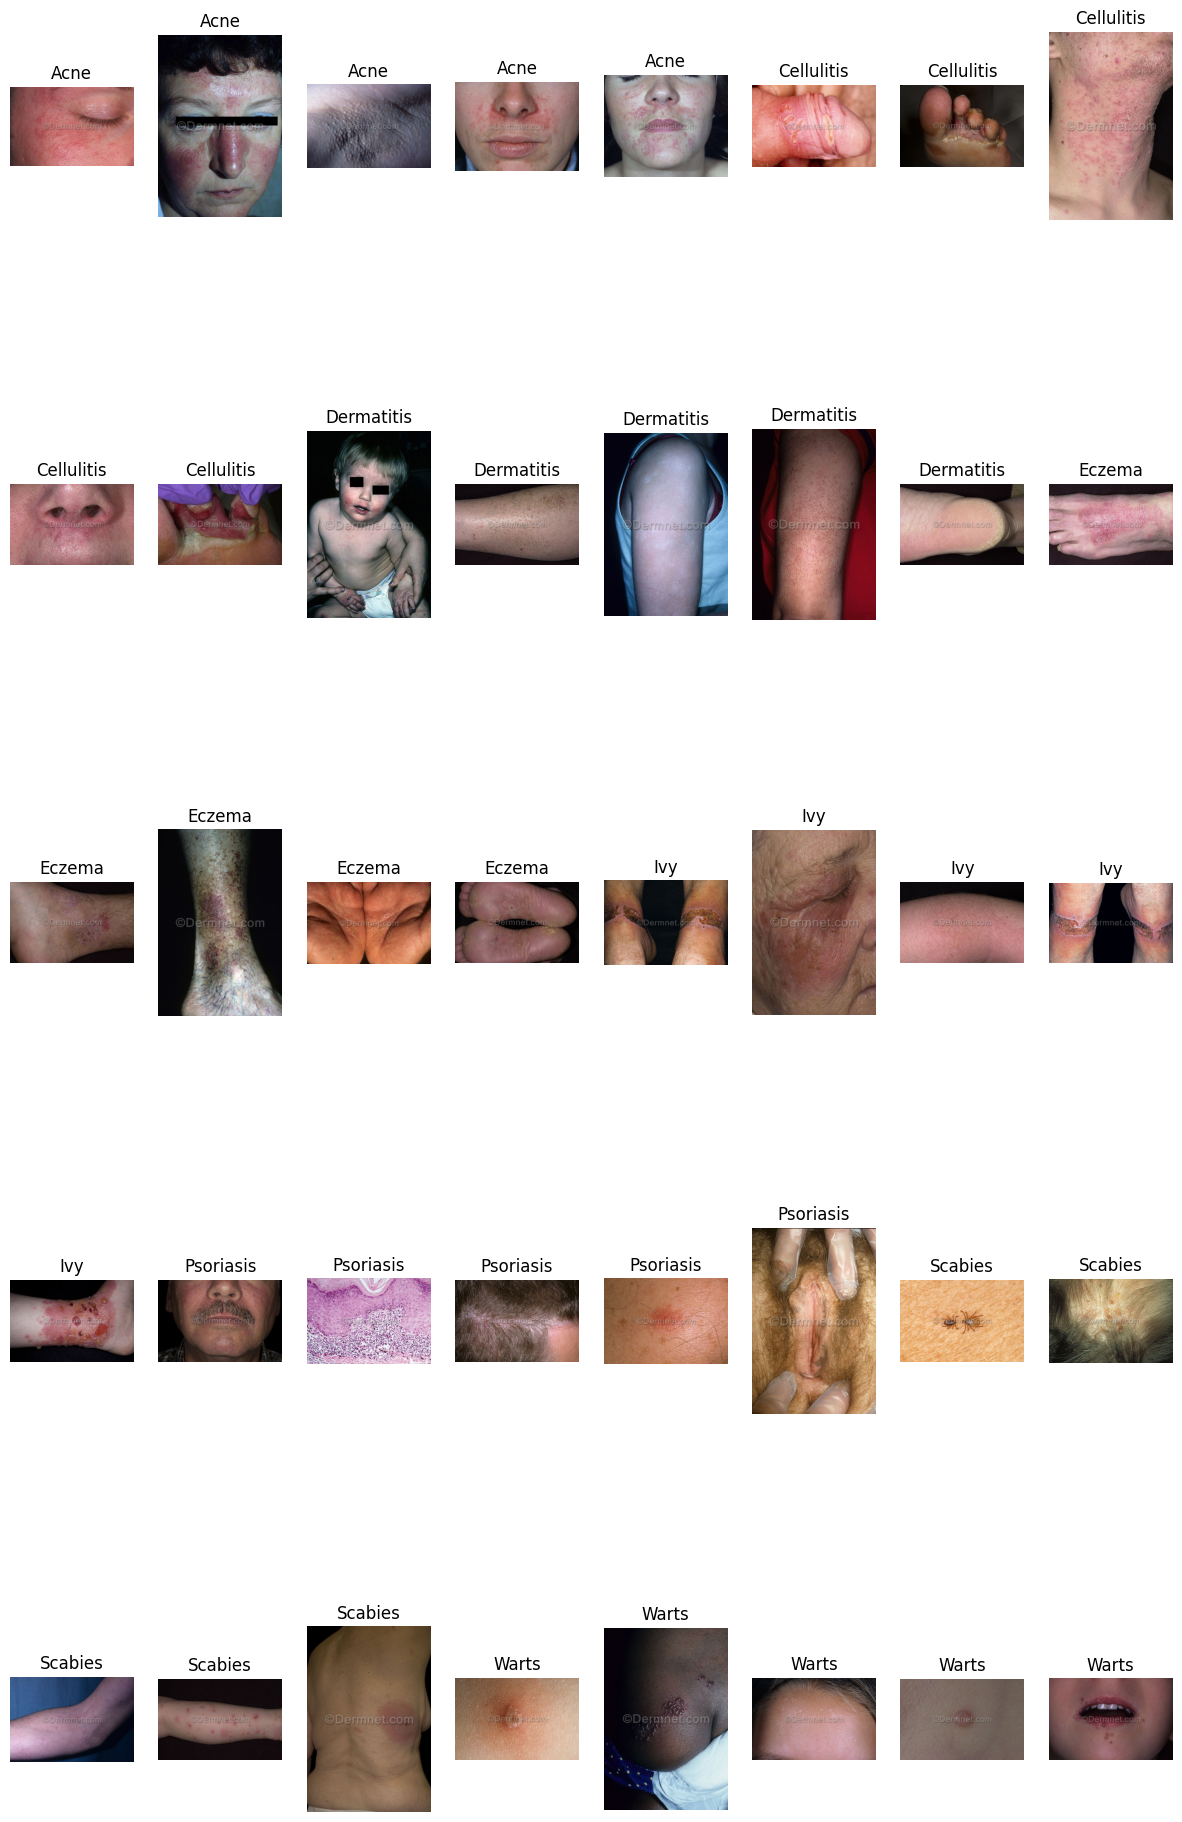

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to visualize image processing
def visualize_img_process(data_dir, pts_per_class, sigmaX):
    classes = ['Acne', 'Cellulitis', 'Dermatitis','Eczema','Ivy','Psoriasis','Scabies','Warts']
    images = []
    labels = []

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        image_files = np.random.choice(os.listdir(class_dir), pts_per_class, replace=False)
        for img_file in image_files:
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            images.append(img)
            labels.append(label)

    plt.figure(figsize=(15, pts_per_class * 5))
    for i, img in enumerate(images):
        plt.subplot(pts_per_class, len(classes), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

visualize_img_process(train_dir, 5, sigmaX=30)

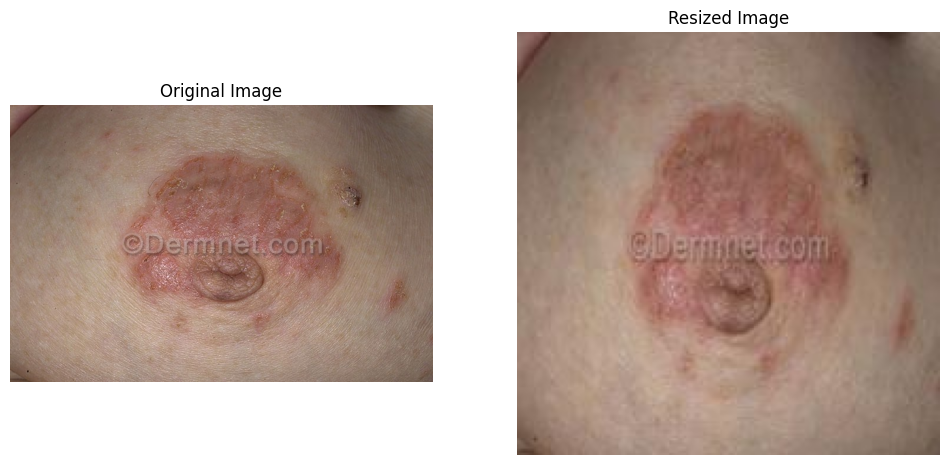

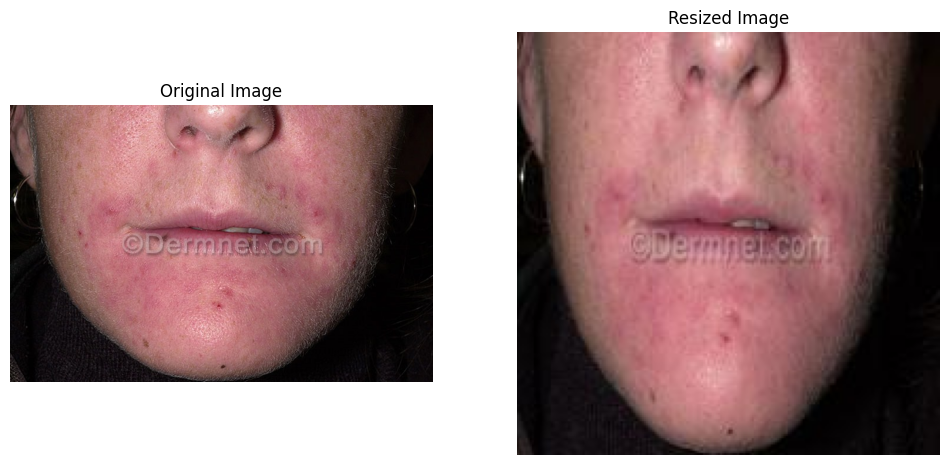

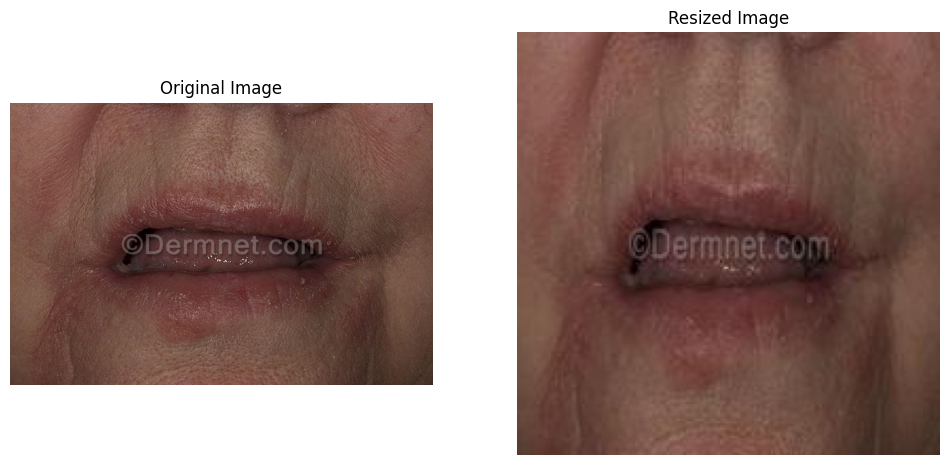

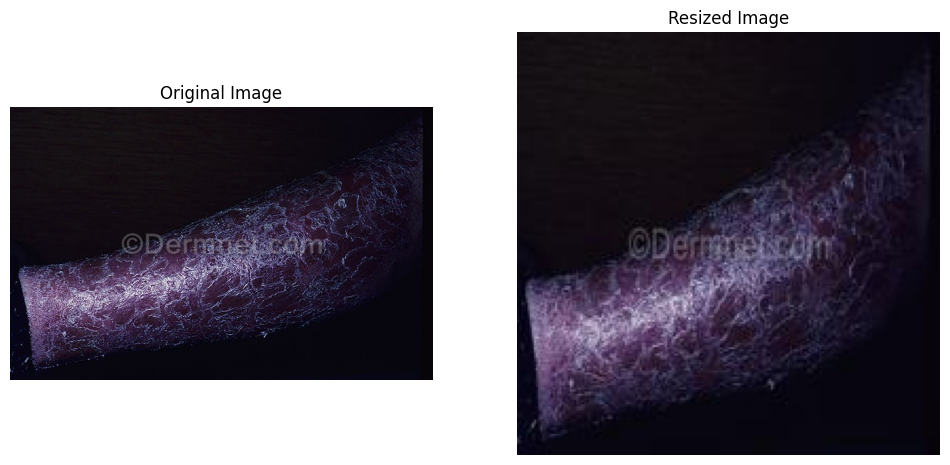

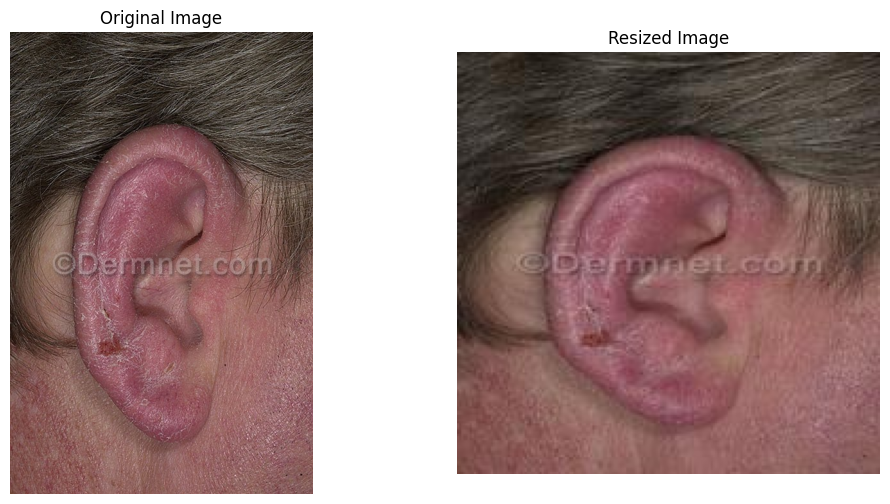

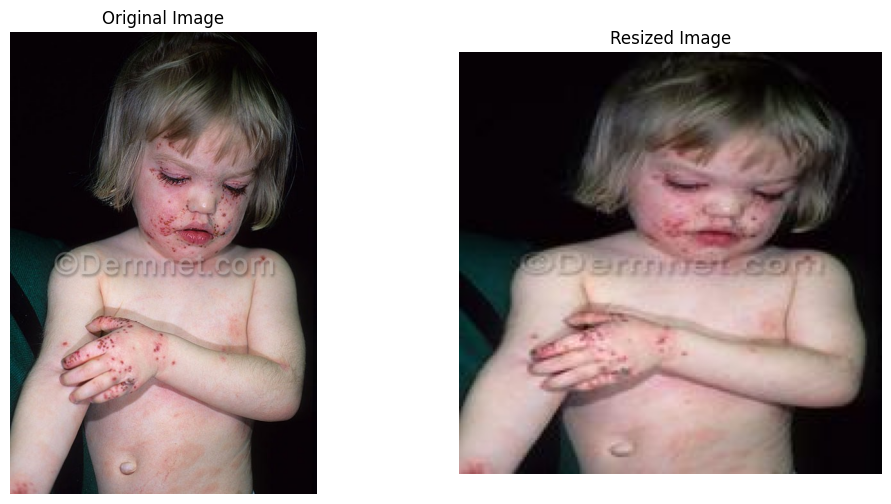

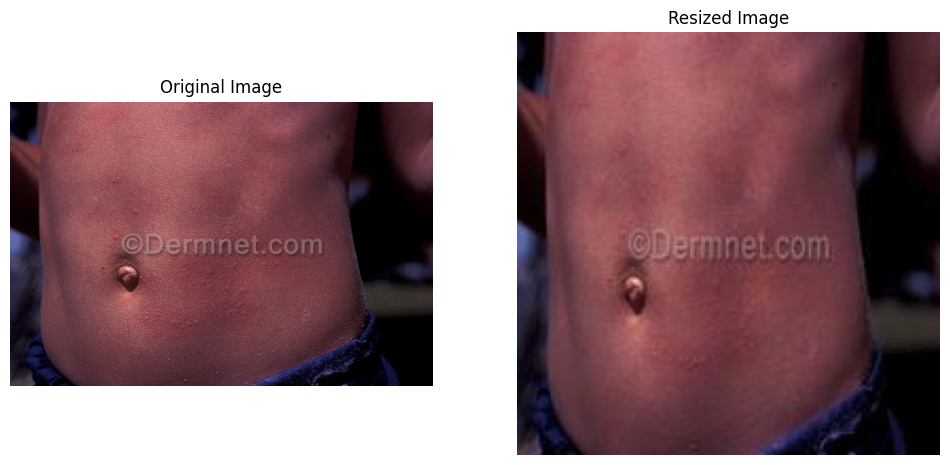

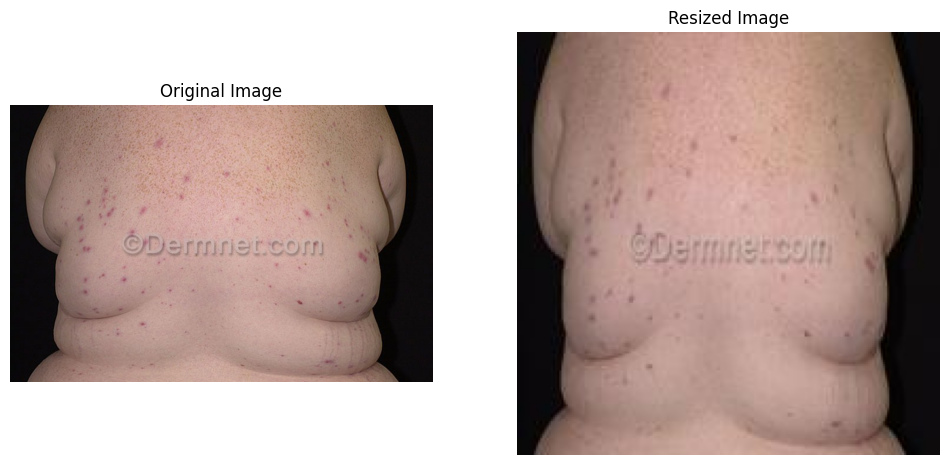

In [ ]:
!pip install Pillow
from PIL import Image
import os
import matplotlib.pyplot as plt

def resize_image(image_path, output_dir, size):
    """Resizes a single image and saves it to the output directory."""
    with Image.open(image_path) as img:
        resized_img = img.resize(size)
        # Construct the output file path
        filename = os.path.basename(image_path)
        output_path = os.path.join(output_dir, filename)
        resized_img.save(output_path)
        return resized_img

def resize_images_in_dir(input_dir, output_dir, size):
    """Resizes all images in the input directory and saves them to the output directory."""
    for subdir, _, files in os.walk(input_dir): # Iterate through subdirectories
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust file extensions as needed
                image_path = os.path.join(subdir, file)
                resize_image(image_path, output_dir, size)

def display_images(original_path, resized_path):
    """Displays the original and resized images side by side."""
    original_img = Image.open(original_path)
    resized_img = Image.open(resized_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(resized_img)
    axes[1].set_title("Resized Image")
    axes[1].axis('off')

    plt.show()

# Set the directories and size
train_dir = '/content/drive/MyDrive/skin diseases/train'
test_dir = '/content/drive/MyDrive/skin diseases/resized_test'
size = (200, 200)

# Resize all images in the train directory, including subdirectories
resize_images_in_dir(train_dir, test_dir, size)

# Example: Display a single resized image
# Iterate through subdirectories to find images
for subdir, _, files in os.walk(train_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            original_image_path = os.path.join(subdir, file)
            resized_image_path = os.path.join(test_dir, file)  # Assuming the file structure is mirrored in test_dir

            # Check if the resized image exists before attempting to display
            if os.path.exists(resized_image_path):
                display_images(original_image_path, resized_image_path)
                break  # Display only the first found image
            else:
                print(f"Resized image not found: {resized_image_path}")